In [1]:
! pip install voronoi

In [21]:
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
from voronoi.point import Point
from voronoi.segment import Segment
from voronoi.diagram import Diagram
from voronoi.faces import Vertex

In [19]:
def delete_vertex(vertex, obstacles):
    vertex = [vertex.x, vertex.y]
    dlt_veretx = False
    for obs in obstacles:
        dlt_veretx = vertex in obs
        if dlt_veretx:
            break
    return dlt_veretx


In [25]:
obstacles = [[[-2,-2],[8,-2], [8,8], [-2,8]],[[0,0],[2,0], [2,2], [0,2]],[[3,3],[7,3], [7,7], [3,7]]]

In [26]:
segments = []

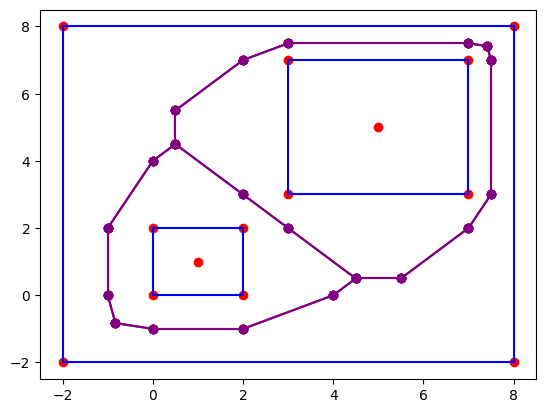

In [51]:
for obstacle in obstacles:
    for ix in range(0,len(obstacle)-1):
        p1 = obstacle[ix]
        p2 = obstacle[ix+1]
        plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
        segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

    p1 = obstacle[0]
    p2 = obstacle[-1]
    plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
    segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

diagram = Diagram()
diagram.construct([], segments)

for vertex in diagram.vertices:
    plt.scatter(vertex.x, vertex.y, color='red')

filtered_edges = [edge for edge in diagram.edges if edge.is_finite and edge.is_primary]
final_edges = []

for edge in filtered_edges:
    start = edge.start
    end = edge.end

    if delete_vertex(start, obstacles) or delete_vertex(end, obstacles):
        pass
    else:
        final_edges.append(edge)
        plt.plot([start.x, end.x],[start.y, end.y], color='purple')
        plt.scatter([start.x, end.x],[start.y, end.y], color='purple')
        # plt.plot([start.x, end.x],[start.y, end.y])
        # plt.scatter([start.x, end.x],[start.y, end.y])


plt.show()

In [29]:
len(segments)

12

Segment(Point(0, 0), Point(2, 0)) Vertex(-1.0, 0.0) Vertex(-0.8284271247461902, -0.8284271247461902)
Segment(Point(0, 0), Point(2, 0)) Vertex(-0.8284271247461902, -0.8284271247461902) Vertex(0.0, -1.0)
Segment(Point(3, 3), Point(7, 3)) Vertex(2.0, 3.0) Vertex(3.0, 2.0)


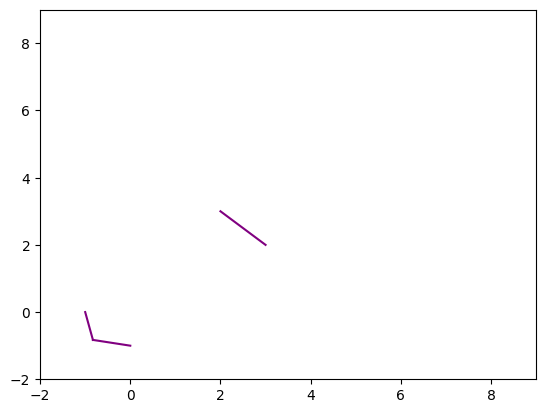

In [62]:
for edge in final_edges:
    if edge.cell.source_category == 1 :
        site = segments[edge.cell.source_index]
        print(site, edge.start, edge.end)
        start = edge.start
        end = edge.end
        plt.plot([start.x, end.x],[start.y, end.y], color='purple')
plt.xlim(-2,9)       
plt.ylim(-2,9)       
plt.show()

In [16]:
diagram.cells

[Cell(0, SourceCategory.SEGMENT_START_POINT),
 Cell(3, SourceCategory.INITIAL_SEGMENT),
 Cell(2, SourceCategory.SEGMENT_END_POINT),
 Cell(0, SourceCategory.INITIAL_SEGMENT),
 Cell(2, SourceCategory.REVERSE_SEGMENT),
 Cell(4, SourceCategory.SEGMENT_START_POINT),
 Cell(7, SourceCategory.INITIAL_SEGMENT),
 Cell(6, SourceCategory.SEGMENT_END_POINT),
 Cell(4, SourceCategory.INITIAL_SEGMENT),
 Cell(6, SourceCategory.REVERSE_SEGMENT),
 Cell(4, SourceCategory.SEGMENT_END_POINT),
 Cell(5, SourceCategory.INITIAL_SEGMENT),
 Cell(5, SourceCategory.SEGMENT_END_POINT),
 Cell(8, SourceCategory.SEGMENT_START_POINT),
 Cell(11, SourceCategory.INITIAL_SEGMENT),
 Cell(10, SourceCategory.SEGMENT_END_POINT),
 Cell(8, SourceCategory.INITIAL_SEGMENT),
 Cell(10, SourceCategory.REVERSE_SEGMENT),
 Cell(8, SourceCategory.SEGMENT_END_POINT),
 Cell(9, SourceCategory.INITIAL_SEGMENT),
 Cell(9, SourceCategory.SEGMENT_END_POINT),
 Cell(0, SourceCategory.SEGMENT_END_POINT),
 Cell(1, SourceCategory.INITIAL_SEGMENT),
 Ce